In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 증상_944_naver_blog.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,944):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배증상_블로그_크롤링2', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배증상_블로그_크롤링2'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 2490)	1
  (1, 13594)	1
  (2, 9067)	1
  (3, 10114)	1
  (4, 6288)	1
  (5, 11341)	1
  (6, 10776)	1
  (7, 8374)	1
  (8, 10125)	1
  (9, 6971)	1
  (10, 1061)	1
  (11, 10597)	1
  (12, 10806)	1
  (13, 8885)	1
  (14, 13594)	1
  (15, 2611)	1
  (16, 1032)	1
  (17, 2293)	1
  (18, 10597)	1
  (19, 5741)	1
  (20, 240)	1
  (21, 11000)	1
  (22, 285)	1
  (23, 5970)	1
  (24, 9587)	1
  :	:
  (224200, 1450)	1
  (224201, 2882)	1
  (224202, 8788)	1
  (224203, 13829)	1
  (224204, 12481)	1
  (224205, 10006)	1
  (224206, 10776)	1
  (224207, 12481)	1
  (224208, 3529)	1
  (224209, 13288)	1
  (224210, 4040)	1
  (224211, 5826)	1
  (224212, 4641)	1
  (224213, 2301)	1
  (224214, 10776)	1
  (224215, 8303)	1
  (224216, 5353)	1
  (224217, 11698)	1
  (224218, 9143)	1
  (224219, 8788)	1
  (224220, 7090)	1
  (224221, 1612)	1
  (224222, 8738)	1
  (224223, 3966)	1
  (224224, 1431)	1


In [8]:
print(vectorize.vocabulary_)

{'대구': 2490, '홍역': 13594, '유행': 9067, '전염': 10114, '성은': 6288, '초기': 11341, '증상': 10776, '예방접종': 8374, '전자담배': 10125, '시가': 6971, '광진구': 1061, '주말': 10597, '지난': 10806, '월요일': 8885, '대한': 2611, '관심': 1032, '다시': 2293, '사이': 5741, '감기': 240, '질병': 11000, '갑자기': 285, '상치': 5970, '일요일': 9587, '병원': 4965, '오늘': 8409, '겨우': 574, '처방': 11196, '현재': 13440, '지난해': 10810, '환자': 13686, '발생': 4587, '경기': 642, '시흥': 7074, '안산': 7588, '통틀어': 12276, '진자': 10960, '만큼': 3649, '얘기': 7847, '그냥': 1329, '수가': 6587, '거기': 428, '다가': 2257, '이하': 9411, '유아': 9023, '나머지': 1788, '의료': 9185, '진과': 10926, '부모님': 5179, '하니아': 12997, '어른': 7866, '서울': 6133, '확진': 13662, '확정': 13661, '지금': 10799, '완치': 8587, '동남아시아': 2851, '바이러스': 4454, '확인': 13659, '무슨': 4147, '연관': 8202, '정도': 10258, '관계자': 1010, '전혀': 10152, '다른': 2274, '타입': 12065, '유형': 9070, '전파': 10146, '동남아': 2850, '일부': 9560, '유럽': 8985, '시작': 7041, '남미': 1880, '확산': 13654, '설명': 6233, '해외': 13276, '유입': 9038, '구나': 1125, '퇴치': 12292, '선언': 6197, '우리나라': 8

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'대구': 30,
 '홍역': 19,
 '유행': 24,
 '전염': 10,
 '성은': 40,
 '초기': 174,
 '증상': 1750,
 '예방접종': 3,
 '전자담배': 10528,
 '시가': 105,
 '광진구': 13,
 '주말': 54,
 '지난': 116,
 '월요일': 44,
 '대한': 522,
 '관심': 143,
 '다시': 433,
 '사이': 111,
 '감기': 122,
 '질병': 136,
 '갑자기': 138,
 '상치': 3,
 '일요일': 43,
 '병원': 156,
 '오늘': 637,
 '겨우': 25,
 '처방': 20,
 '현재': 226,
 '지난해': 25,
 '환자': 158,
 '발생': 693,
 '경기': 40,
 '시흥': 3,
 '안산': 12,
 '통틀어': 1,
 '진자': 5,
 '만큼': 93,
 '얘기': 110,
 '그냥': 364,
 '수가': 100,
 '거기': 112,
 '다가': 41,
 '이하': 50,
 '유아': 10,
 '나머지': 37,
 '의료': 32,
 '진과': 2,
 '부모님': 10,
 '하니아': 2,
 '어른': 10,
 '서울': 77,
 '확진': 6,
 '확정': 7,
 '지금': 382,
 '완치': 12,
 '동남아시아': 2,
 '바이러스': 43,
 '확인': 342,
 '무슨': 54,
 '연관': 44,
 '정도': 979,
 '관계자': 10,
 '전혀': 208,
 '다른': 521,
 '타입': 73,
 '유형': 20,
 '전파': 8,
 '동남아': 2,
 '일부': 88,
 '유럽': 32,
 '시작': 532,
 '남미': 1,
 '확산': 20,
 '설명': 344,
 '해외': 74,
 '유입': 90,
 '구나': 7,
 '퇴치': 3,
 '선언': 7,
 '우리나라': 85,
 '세계보건기구': 38,
 '태평양': 1,
 '지역': 38,
 '인증': 100,
 '위원회': 9,
 '로부터': 41,
 '나라': 28,


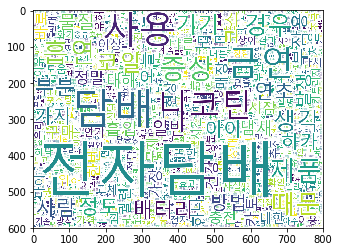

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'대구': 2490, '홍역': 13594, '유행': 9067, '전염': 10114, '성은': 6288, '초기': 11341, '증상': 10776, '예방접종': 8374, '전자담배': 10125, '시가': 6971, '광진구': 1061, '주말': 10597, '지난': 10806, '월요일': 8885, '대한': 2611, '관심': 1032, '다시': 2293, '사이': 5741, '감기': 240, '질병': 11000, '갑자기': 285, '상치': 5970, '일요일': 9587, '병원': 4965, '오늘': 8409, '겨우': 574, '처방': 11196, '현재': 13440, '지난해': 10810, '환자': 13686, '발생': 4587, '경기': 642, '시흥': 7074, '안산': 7588, '통틀어': 12276, '진자': 10960, '만큼': 3649, '얘기': 7847, '그냥': 1329, '수가': 6587, '거기': 428, '다가': 2257, '이하': 9411, '유아': 9023, '나머지': 1788, '의료': 9185, '진과': 10926, '부모님': 5179, '하니아': 12997, '어른': 7866, '서울': 6133, '확진': 13662, '확정': 13661, '지금': 10799, '완치': 8587, '동남아시아': 2851, '바이러스': 4454, '확인': 13659, '무슨': 4147, '연관': 8202, '정도': 10258, '관계자': 1010, '전혀': 10152, '다른': 2274, '타입': 12065, '유형': 9070, '전파': 10146, '동남아': 2850, '일부': 9560, '유럽': 8985, '시작': 7041, '남미': 1880, '확산': 13654, '설명': 6233, '해외': 13276, '유입': 9038, '구나': 1125, '퇴치': 12292, '선언': 6197, '우리나라': 8

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

stop_list=['금연', '선택', '요즘', '현재', '대한', '제품', '먼저', '물질', '유해', '언제', '느낌', '제일', '부분', '연초', '담배', '달리', '방법', '한번', '사용', '사실', '거의', '위해', '배터리', '만큼', '발표', '정도', '청소', '직접', '가장', '이번', '전자담배', '결과', '증상', '모두', '카트리지', '자체', '정말', '포함', '서면', '코일', '저희', '마음', '역시', '사진', '항상', '통해', '모든', '시작', '일반', '여기', '무엇', '중독', '이용', '하나', '동안', '모드', '방식', '차이', '여러분', '사람', '다른', '내용', '니코틴', '조금', '처음', '확인', '우리', '탱크', '등등', '이유', '하루', '아주', '약간', '효과', '매우', '점점', '계속', '진짜', '최근', '가지', '설명', '경우', '실제', '해도', '거나', '오늘', '거기', '다시', '기능', '완전', '때문', '또한', '오히려', '일단', '부산', '생각', '하카', '여러', '바로', '블랙', '전혀', '그냥', '하니', '친구', '지금', '뭔가', '시간', '보고', '이제', '궐련', '대해', '기존', '대신', '더욱', '소개', '흡연', '보통', '상이']
for i in stop_list:
    dict_result.pop(i)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('기기', 1184.0)
('아이', 771.0)
('부작용', 710.0)
('발생', 693.0)
('냄새', 628.0)
('코스', 626.0)
('흡입', 626.0)
('구매', 598.0)
('카토', 588.0)
('건강', 558.0)
('매장', 532.0)
('충전', 531.0)
('현상', 521.0)
('문제', 518.0)
('이상', 512.0)
('마이', 487.0)
('교체', 478.0)
('구입', 464.0)
('추천', 461.0)
('연기', 441.0)
('도움', 434.0)
('전담', 434.0)
('상태', 434.0)
('성분', 432.0)
('가격', 404.0)
('하남', 392.0)
('베이핑', 365.0)
('버튼', 354.0)
('전자', 346.0)
('판매', 342.0)
('포스팅', 337.0)
('화기', 330.0)
('연구', 321.0)
('방문', 311.0)
('금단증상', 310.0)
('종류', 308.0)
('장점', 301.0)
('원인', 298.0)
('발암', 292.0)
('디자인', 284.0)
('통증', 283.0)
('비교', 283.0)
('대부분', 282.0)
('상의', 259.0)
('호흡', 259.0)
('농도', 257.0)
('보시', 254.0)
('해결', 248.0)
('시연', 248.0)
('개인', 243.0)
('기침', 242.0)
('타르', 242.0)
('보조', 242.0)
('조절', 240.0)
('보기', 234.0)
('주변', 231.0)
('두통', 230.0)
('영향', 229.0)
('경험', 227.0)
('홀릭', 227.0)
('국내', 226.0)
('다음', 225.0)
('머리', 224.0)
('위험', 222.0)
('무화량', 219.0)
('조사', 215.0)
('에바', 215.0)
('걱정', 214.0)
('관련', 213.0)
('회사', 211.0)
('이기', 211.

('순서대로', 9.0)
('남친', 9.0)
('발라', 9.0)
('허용', 9.0)
('최적화', 9.0)
('정량', 9.0)
('달성', 9.0)
('힐링', 9.0)
('함부로', 9.0)
('장만', 9.0)
('엄마', 9.0)
('개성', 9.0)
('칭찬', 9.0)
('농축', 9.0)
('호텔', 9.0)
('개최', 9.0)
('기념', 9.0)
('수정', 9.0)
('본부', 9.0)
('환상', 9.0)
('논쟁', 9.0)
('지출', 9.0)
('섭씨', 9.0)
('고도', 9.0)
('지연', 9.0)
('정서', 9.0)
('수일', 9.0)
('수주', 9.0)
('발현', 9.0)
('두뇌', 9.0)
('토론', 9.0)
('달러', 9.0)
('사정', 9.0)
('진입', 9.0)
('제약', 9.0)
('결과물', 9.0)
('역학', 9.0)
('체계', 9.0)
('중복', 9.0)
('학교', 9.0)
('간의', 9.0)
('궐연', 9.0)
('미약', 9.0)
('초미세먼지', 9.0)
('런던', 9.0)
('최적', 9.0)
('배제', 9.0)
('참으로', 9.0)
('방면', 9.0)
('중요', 9.0)
('불쾌감', 9.0)
('후의', 9.0)
('고유', 9.0)
('탄화', 9.0)
('배송비', 9.0)
('정화', 9.0)
('집계', 9.0)
('컨셉', 9.0)
('장비', 9.0)
('감히', 9.0)
('단축', 9.0)
('강력', 9.0)
('공항', 9.0)
('나볼', 9.0)
('당일', 9.0)
('부산시', 9.0)
('고의', 9.0)
('사후', 9.0)
('각심', 9.0)
('리스크', 9.0)
('균형', 9.0)
('안해', 9.0)
('보편', 9.0)
('장창', 9.0)
('이보', 9.0)
('큰일', 9.0)
('히터', 9.0)
('공인', 9.0)
('생로병사', 9.0)
('간암', 9.0)
('맥박', 9.0)
('크류', 9.0)
(

('압수', 3.0)
('레포트', 3.0)
('땅콩', 3.0)
('베이직', 3.0)
('슈가', 3.0)
('더더', 3.0)
('전쟁', 3.0)
('펠릭스', 3.0)
('후지', 3.0)
('레이', 3.0)
('레몬에이드', 3.0)
('시지', 3.0)
('선발', 3.0)
('아라하', 3.0)
('시한', 3.0)
('반년', 3.0)
('짜장면', 3.0)
('아부지', 3.0)
('매료', 3.0)
('고고싱', 3.0)
('에탄올', 3.0)
('캠프', 3.0)
('김대진', 3.0)
('뇌출혈', 3.0)
('대감', 3.0)
('온종일', 3.0)
('살충제', 3.0)
('입하', 3.0)
('초이스', 3.0)
('다이아몬드', 3.0)
('눈차', 3.0)
('음미', 3.0)
('입도', 3.0)
('격하', 3.0)
('협박', 3.0)
('챔버', 3.0)
('협소', 3.0)
('인내심', 3.0)
('외투', 3.0)
('잔뜩', 3.0)
('리티', 3.0)
('장도', 3.0)
('어쩐지', 3.0)
('찰떡', 3.0)
('어요', 3.0)
('가오', 3.0)
('시골', 3.0)
('초로', 3.0)
('오니', 3.0)
('오늘이', 3.0)
('팬층', 3.0)
('팔로워', 3.0)
('팔로잉', 3.0)
('음해', 3.0)
('낭패', 3.0)
('인제', 3.0)
('귀신', 3.0)
('냉동', 3.0)
('옥션', 3.0)
('구함', 3.0)
('세분', 3.0)
('던힐', 3.0)
('주정', 3.0)
('하늘만', 3.0)
('대상포진', 3.0)
('항상성', 3.0)
('기여', 3.0)
('선국', 3.0)
('가수', 3.0)
('출고', 3.0)
('케페시터', 3.0)
('오디오', 3.0)
('클라우드', 3.0)
('효녀', 3.0)
('영영', 3.0)
('주철', 3.0)
('설계자', 3.0)
('황당', 3.0)
('도시괴담', 3.0)
('잔치', 3.0)
('즉슨

('구직', 2.0)
('기차', 2.0)
('이제껏', 2.0)
('모르거나', 2.0)
('크롤', 2.0)
('아세톤', 2.0)
('졸라', 2.0)
('지은', 2.0)
('집밥', 2.0)
('인듈', 2.0)
('바이스', 2.0)
('가해자', 2.0)
('기소', 2.0)
('사죄', 2.0)
('금고', 2.0)
('랭킹', 2.0)
('테스토스테론', 2.0)
('산딸기', 2.0)
('신천동', 2.0)
('타운', 2.0)
('미채', 2.0)
('집안일', 2.0)
('찌뿌둥', 2.0)
('아스파르트산', 2.0)
('스샷', 2.0)
('누울', 2.0)
('가쁜', 2.0)
('칼칼', 2.0)
('평내동', 2.0)
('복의', 2.0)
('알츠하이머병', 2.0)
('가평', 2.0)
('유관', 2.0)
('고령화', 2.0)
('지상', 2.0)
('이사장', 2.0)
('최양락', 2.0)
('관내', 2.0)
('동천', 2.0)
('김경주', 2.0)
('동부', 2.0)
('정선', 2.0)
('에쿠스', 2.0)
('애칭', 2.0)
('포팅', 2.0)
('금동', 2.0)
('부드러움', 2.0)
('입병', 2.0)
('세미', 2.0)
('오심', 2.0)
('기혼', 2.0)
('신명', 2.0)
('정신질환', 2.0)
('의욕', 2.0)
('매스', 2.0)
('껑충', 2.0)
('덕지덕지', 2.0)
('아드레날린', 2.0)
('비밀번호', 2.0)
('성별', 2.0)
('딸꾹질', 2.0)
('포탈', 2.0)
('도사', 2.0)
('마게', 2.0)
('가타', 2.0)
('히토미', 2.0)
('와타시', 2.0)
('영원', 2.0)
('와스', 2.0)
('키시', 2.0)
('아코', 2.0)
('테오', 2.0)
('히로', 2.0)
('츠요쿠', 2.0)
('케토', 2.0)
('츠바사', 2.0)
('마이아', 2.0)
('유쿠', 2.0)
('카마', 2.0)
('루시', 

('골든타임', 1.0)
('치루어', 1.0)
('생매장', 1.0)
('극세사', 1.0)
('몸매', 1.0)
('수문', 1.0)
('라디오', 1.0)
('교통공학', 1.0)
('통역', 1.0)
('연동', 1.0)
('개악', 1.0)
('롱노', 1.0)
('앗차', 1.0)
('리부팅', 1.0)
('프로그래밍', 1.0)
('조로증', 1.0)
('위국', 1.0)
('그땐', 1.0)
('개월뒤', 1.0)
('원금', 1.0)
('보햄', 1.0)
('플랜', 1.0)
('친한친구', 1.0)
('삼파전', 1.0)
('성조기', 1.0)
('나본', 1.0)
('엔지니어', 1.0)
('명단', 1.0)
('손잡이', 1.0)
('금테', 1.0)
('빗살', 1.0)
('위잉', 1.0)
('달라짐', 1.0)
('핀인', 1.0)
('꾸욱', 1.0)
('철로', 1.0)
('뉴잉글랜드', 1.0)
('희진', 1.0)
('결실', 1.0)
('별의별', 1.0)
('었다', 1.0)
('그랫기', 1.0)
('쉬는시간', 1.0)
('보르', 1.0)
('연회', 1.0)
('호호', 1.0)
('통분', 1.0)
('매쉬', 1.0)
('이용권', 1.0)
('건전', 1.0)
('치한', 1.0)
('수증', 1.0)
('쇼트나', 1.0)
('징조', 1.0)
('뱃터리', 1.0)
('하카인', 1.0)
('공홈', 1.0)
('개사', 1.0)
('공란', 1.0)
('주마', 1.0)
('똑뗴', 1.0)
('컬쳐쇼크', 1.0)
('개팟', 1.0)
('본액', 1.0)
('쥴팟중', 1.0)
('돌직구', 1.0)
('우주', 1.0)
('술때', 1.0)
('서클', 1.0)
('자장면', 1.0)
('진량', 1.0)
('곽광', 1.0)
('잔티위', 1.0)
('모태', 1.0)
('공정은', 1.0)
('잔티사', 1.0)
('찬사', 1.0)
('티져', 1.0)
('벨런스', 1.0)
('리빌드용', 1

('대수', 1.0)
('성하', 1.0)
('국무회의', 1.0)
('정령', 1.0)
('심의', 1.0)
('청소툴', 1.0)
('구먼', 1.0)
('담뱃재들', 1.0)
('안터', 1.0)
('권렬', 1.0)
('운맛', 1.0)
('결별', 1.0)
('버닝타임', 1.0)
('한마음', 1.0)
('헨드폰', 1.0)
('택했는', 1.0)
('과히', 1.0)
('뇌질', 1.0)
('설때', 1.0)
('루프', 1.0)
('니켈카드뮴', 1.0)
('불기', 1.0)
('마린', 1.0)
('큐브', 1.0)
('진시', 1.0)
('규탄', 1.0)
('피크닉', 1.0)
('아연', 1.0)
('구루병', 1.0)
('망가니즈', 1.0)
('무기염류', 1.0)
('불임', 1.0)
('멸치', 1.0)
('볶음', 1.0)
('복부비만', 1.0)
('쌀밥', 1.0)
('현미', 1.0)
('아스파라거스', 1.0)
('대덕구', 1.0)
('하울링', 1.0)
('닛잔티', 1.0)
('쿠틴', 1.0)
('갤러리아', 1.0)
('세이', 1.0)
('서대전', 1.0)
('신탄진', 1.0)
('진잠', 1.0)
('녹차아이스크림', 1.0)
('단감', 1.0)
('국화', 1.0)
('율무', 1.0)
('릭에서홀릭', 1.0)
('없죠잉', 1.0)
('영양성분', 1.0)
('지혈', 1.0)
('항균', 1.0)
('당체', 1.0)
('릭의홀릭', 1.0)
('와쥬셔', 1.0)
('지행동', 1.0)
('지행역', 1.0)
('미장', 1.0)
('취양', 1.0)
('경상남도', 1.0)
('양산시', 1.0)
('물금읍', 1.0)
('황산로', 1.0)
('통도사', 1.0)
('외대', 1.0)
('부산외국어대학교', 1.0)
('노포', 1.0)
('범어사', 1.0)
('석산', 1.0)
('눈땜시', 1.0)
('옷가게', 1.0)
('봄옷', 1.0)
('용봄', 1.0)
('아군', 1.0)
(

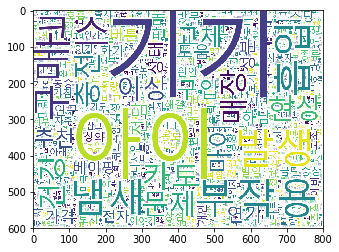

In [19]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict_result)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()